In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.3.8
    Uninstalling openai-1.3.8:
      Successfully uninstalled openai-1.3.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


Enter the OpenAI API Key in the cell  ··········
Provide information about your current mood or situation: i want to be a successfull business man
Generated Book Recomendation:
Title: "Rich Dad Poor Dad"
Author: Robert T. Kiyosaki

Summary:
"Rich Dad Poor Dad" is a personal finance book that provides practical advice and insights on how to achieve financial independence. The author, Robert T. Kiyosaki, shares his personal story of growing up with two fathers - his real father (poor dad) and the father of his best friend (rich dad). Through contrasting their different approaches to money and financial education, Kiyosaki


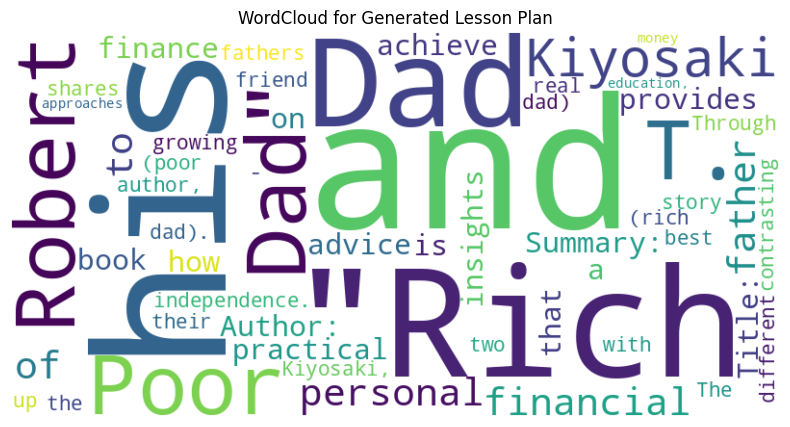

In [ ]:
import openai
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


from getpass import getpass

openai.api_key = getpass('Enter the OpenAI API Key in the cell  ')


def generate_book_recommendation(user_input):
    # User input for generating Book
    prompt = f"Could you please suggest a book for me to read based on my current mood or situation, and provide a summary along with the author's details:\n{user_input}\nBook recomendation:"

    # Generate response using GPT-3.5-turbo
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo-16k",  # Use "gpt-3.5-turbo-16k" for GPT-3.5-turbo
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=100,
        n=1,
        stop=None,
        temperature=0.7,
    )

    # Extract the generated Book from the response
    Book_recomendation = response['choices'][0]['message']['content']

    return Book_recomendation

# Get user input interactively
user_input = input("Provide information about your current mood or situation: ")

# Generate the Book recomendation
Book_recomendation = generate_book_recommendation(user_input)
print("Generated Book Recomendation:")
print(Book_recomendation)

# Tokenize the Book Recomendation and count word frequencies
tokens = Book_recomendation.split()
word_freq = Counter(tokens)


tokens = Book_recomendation.split()
word_freq = Counter(tokens)

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Generated Book recomendation')
plt.show()